# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch 
from torch import nn
from collections import deque
import random
import matplotlib.pyplot as plt
import time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /home/vijayah/deep-reinforcement-learning/p2_continuous-control/./Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/home/vijayah/deep-reinforcement-learning/p2_continuous-control/./Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/home/vijayah/deep-reinforcement-learning/p2_continuous-control/./Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/vijayah/.config/unity3d/Unity Technologies/Unity Environment/Player.log
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/vijayah/.config/unity3d/Unity Technologies/Unity Environment/Player.log


Failed to create secure directory (/run/user/1001/pulse): No such file or directory
Failed to create secure directory (/run/user/1001/pulse): No such file or directory
Failed to create secure directory (/run/user/1001/pulse): No such file or directory
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains 

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### 2. State and Action Spaces and condition for solving the problem

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Problem considered solved if we achieve an average score of 30 over 100 consecutive episodes.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Hyperparameter Tuning

Below are the hyperparameters used for training the agent using DDPG algorithm. These values were obtained after tuning and experimenting with different values.

In [ ]:

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128         # minibatch size
GAMMA = 0.995            # discount factor
TAU = 1e-3               # for soft update of target parameters
LRA = 1e-4               # learning rate for actor
LRC = 1e-3               # learning rate for critic
UPDATE_EVERY = 4         # how often to update the network
SEED = 0                 # random seed
EPSILON = 1.0            # initial epsilon for exploration
EPSILON_DECAY = 0.995    # epsilon decay rate per episode
EPSILON_MIN = 0.01       # minimum epsilon

### Network Architecture Description

The agent uses the Deep Deterministic Policy Gradient (DDPG) algorithm, which consists of two neural networks: an Actor and a Critic.

- **Actor Network:**  
  The actor maps states to actions. It consists of two hidden layers with 100 units each, using ReLU activations, followed by an output layer with a tanh activation to ensure actions are in the range [-1, 1].

- **Critic Network:**  
  The critic evaluates the value of state-action pairs. It takes both the state and action as input, concatenates them, and passes them through two hidden layers (100 units each, ReLU activations), followed by a linear output layer that predicts the Q-value.

Both networks are trained using experiences sampled from a replay buffer, and target networks are updated using soft updates for stability.

In [6]:

import torch.nn.functional as F
class Actor(nn.Module):
    def __init__(self, nS, nA): # nS: state space size, nA: action space size
        super(Actor, self).__init__()

        self.h1 = nn.Linear(nS, 100)
        self.h2 = nn.Linear(100, 100)
        self.out = nn.Linear(100, nA)

    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.tanh(self.out(x))
        return x


class Critic(nn.Module):
    def __init__(self, nS, nA): # nS: state space size, nA: action space size
        super(Critic, self).__init__()

        self.h1 = nn.Linear(nS + nA, 100)
        self.h2 = nn.Linear(100, 100)
        self.out = nn.Linear(100, 1)

    def forward(self, s, a):
        x = torch.cat((s, a), dim=1)
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = self.out(x)
        return x


In [7]:
import copy


class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.normal(size=len(x))
        self.state = x + dx
        return self.state

Standard Replay buffer used with a size of 1,000,000 and batch size of 128.

```python

In [8]:
from collections import namedtuple


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

### DDPGAgent Implementation Details

The `DDPGAgent` class implements the Deep Deterministic Policy Gradient algorithm for continuous control tasks. Key features and implementation details include:

- **Actor and Critic Networks:**  
  Both local and target networks are created for the actor and critic, using two hidden layers of 100 units each. The actor outputs actions in the range [-1, 1] using a tanh activation.

- **Replay Buffer:**  
  Experiences are stored in a replay buffer with a capacity of 1,000,000 and sampled in batches of 128 for training.

- **Ornstein-Uhlenbeck Noise:**  
  Exploration is encouraged by adding temporally correlated noise to actions using the OU process.

- **Learning and Updates:**  
  The agent updates its networks every 4 steps if enough samples are available. The critic is trained using the mean squared error between predicted and target Q-values, while the actor is trained to maximize expected Q-values. Gradients are clipped for stability.

- **Soft Target Updates:**  
  Target networks are updated using soft updates with a small interpolation factor (`tau`), ensuring stable learning.

- **Multi-Agent Support:**  
  The agent is designed to handle multiple agents by averaging rewards and handling state/action batches.

- **Solving Criterion:**  
  Training stops when the average score over 100 episodes reaches 30, and the trained actor network is saved.

This implementation balances stability and exploration, making it suitable for solving the Unity Reacher environment.

In [9]:

class DDPGAgent:
    def __init__(self, state_size, action_size, random_seed=0):
        self.state_size = state_size
        self.action_size = action_size
        self.random_seed = random_seed
        
        self.agent_local = Actor(state_size, action_size).to(device)
        self.agent_target = Actor(state_size, action_size).to(device)
        
        self.critic_local = Critic(state_size, action_size).to(device)
        self.critic_target = Critic(state_size, action_size).to(device)
        
        self.optimizer_actor = torch.optim.Adam(self.agent_local.parameters(), lr=LRA)
        self.optimizer_critic = torch.optim.Adam(self.critic_local.parameters(), lr=LRC)
        self.memory = ReplayBuffer(action_size, buffer_size=int(BUFFER_SIZE), batch_size=BATCH_SIZE, seed=random_seed)
        self.noise = OUNoise(action_size, random_seed)
        self.t_step = 0
        self.soft_update(self.agent_local, self.agent_target, 1.0)
        self.soft_update(self.critic_local, self.critic_target, 1.0)
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        self.memory.add(state,action,reward,next_state,done)
        
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)
    
    def action(self, state,noise):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.agent_local.eval()
        with torch.no_grad():
            action = self.agent_local(state).cpu().data.numpy().squeeze(0)
        self.agent_local.train()
        action += self.noise.sample() *noise  # add noise for exploration
        return np.clip(action, -1, 1)

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples."""
        states, actions, rewards, next_states, dones = experiences
        
        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q
        # critic is updated using Q values 
        # critic_target is used to get the expected Q values for the next states
        
        with torch.no_grad():
            Q_target_next = self.critic_target(next_states, self.agent_target(next_states))
        Q_target = rewards + (gamma * Q_target_next * (1 - dones))
        Q_expected = self.critic_local(states, actions)
        loss = F.mse_loss(Q_expected, Q_target)
        self.optimizer_critic.zero_grad()  
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1.0)
        self.optimizer_critic.step()
        
        action_pred = self.agent_local(states)
        action_loss = -self.critic_local(states, action_pred).mean() 
        self.optimizer_actor.zero_grad()
        action_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.agent_local.parameters(), 1.0)
        self.optimizer_actor.step()
        
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.agent_local, self.agent_target, TAU)
        
        
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
    
    def reset(self):
        self.noise.reset()

Episode: 1	 Score: 0.14999999664723873	 Avg. Reward: 0.14999999664723873
Episode: 2	 Score: 0.36999999172985554	 Avg. Reward: 0.25999999418854713
Episode: 2	 Score: 0.36999999172985554	 Avg. Reward: 0.25999999418854713
Episode: 3	 Score: 0.6999999843537807	 Avg. Reward: 0.40666665757695836
Episode: 3	 Score: 0.6999999843537807	 Avg. Reward: 0.40666665757695836
Episode: 4	 Score: 0.9399999789893627	 Avg. Reward: 0.5399999879300594
Episode: 4	 Score: 0.9399999789893627	 Avg. Reward: 0.5399999879300594
Episode: 5	 Score: 0.24999999441206455	 Avg. Reward: 0.4819999892264605
Episode: 5	 Score: 0.24999999441206455	 Avg. Reward: 0.4819999892264605
Episode: 6	 Score: 0.24999999441206455	 Avg. Reward: 0.4433333234240611
Episode: 6	 Score: 0.24999999441206455	 Avg. Reward: 0.4433333234240611
Episode: 7	 Score: 0.0	 Avg. Reward: 0.3799999915063381
Episode: 7	 Score: 0.0	 Avg. Reward: 0.3799999915063381
Episode: 8	 Score: 0.2899999935179949	 Avg. Reward: 0.3687499917577952
Episode: 8	 Score: 0.289

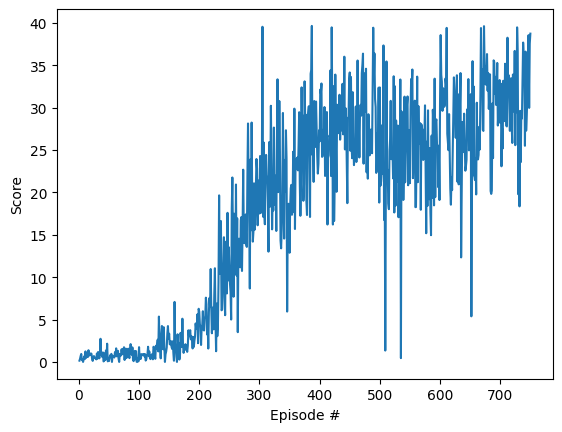

In [10]:
agent = DDPGAgent(action_size=4,state_size=33)

def ddpg(n_episodes=10000, max_t=200, print_every=100):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores                  # initialize epsilon
    noise_scale=0.2
    noise_decay=0.999
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations
        agent.reset()
        score = 0
        while True:
            action = agent.action(state,noise_scale)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations if len(env_info.vector_observations) > 0 else None
            reward = env_info.rewards                   # get the reward
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += np.mean(reward)
            noise_scale *= noise_decay
            if np.any(done):
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        average_reward = sum(scores_window)/len(scores_window)
        print('Episode: {}\t Score: {}\t Avg. Reward: {}'.format(i_episode, score, average_reward))
        if average_reward >= 30:
            print("\t--> SOLVED! <--\t")
            torch.save(agent.agent_target.state_dict(), 'checkpoint.pth')
            break
    return scores


scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:



env.close()